In [1]:
import os 
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
os.chdir("/content/gdrive/MyDrive/DATA255_Project/Data_Source")

In [3]:
import pandas as pd
import numpy as np
import random

import re 
import string

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer 
from wordcloud import WordCloud, STOPWORDS

from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [4]:
df_politics = pd.read_csv('WELFake_Dataset.csv')
df_politics = df_politics[['title', 'text', 'label']]
df_politics['text'] = df_politics['title']+df_politics['text']
df_politics = df_politics[['text', 'label']]
df_politics = df_politics.dropna()

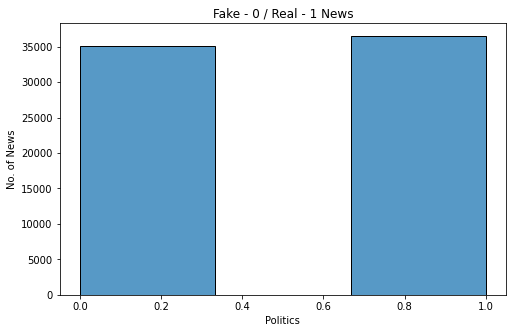

In [8]:
plt.figure(figsize = (8,5))
sns.histplot(df_politics['label'], stat='count', bins = 3)
plt.xlabel('Politics')
plt.ylabel('No. of News')
plt.title('Fake - 0 / Real - 1 News')
plt.show()

In [9]:
df_entertainment = pd.read_csv('FakeNewsNet.csv')
df_entertainment = df_entertainment[['title',  'real']]
df_entertainment = df_entertainment.rename(columns={'title': 'text', 'real': 'label'})
df_entertainment = df_entertainment.dropna()

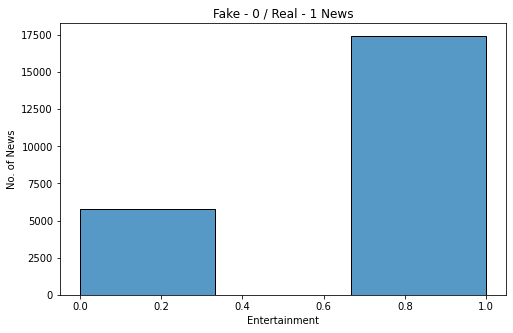

In [10]:
plt.figure(figsize = (8,5))
sns.histplot(df_entertainment['label'], stat='count', bins = 3)
plt.xlabel('Entertainment')
plt.ylabel('No. of News')
plt.title('Fake - 0 / Real - 1 News')
plt.show()

In [11]:
df_healthcare_fake = pd.read_csv('fake.csv')
df_healthcare_fake['label'] = 0
df_healthcare_true = pd.read_csv('true.csv')
df_healthcare_true['label'] = 1
df_healthcare = pd.concat([df_healthcare_fake, df_healthcare_true])
df_healthcare = df_healthcare[['Title', 'Content', 'label']]
df_healthcare['text'] = df_healthcare['Title']+df_healthcare['Content']
df_healthcare = df_healthcare[['text', 'label']]
df_healthcare = df_healthcare.dropna()
df_healthcare

,text,label
0,"Mother, daughter exchange encoded menstruation...",0
1,Vaxxed covidiots developing auto-immune disord...,0
2,"Colorado, oklahoma hold phone campaigns to boo...",0
3,Bird arthritis epidemic largely ignoredOfficia...,0
4,Mississippi bans soft drinks smaller than 20 o...,0
...,...,...
7827,1 in 5 healthcare workers yet to receive secon...,1
7828,Five states account for 43% of the country's n...,1
7829,Black or 'other'? doctors may be relying on ra...,1
7830,Pharmacists now allowed to administer childhoo...,1


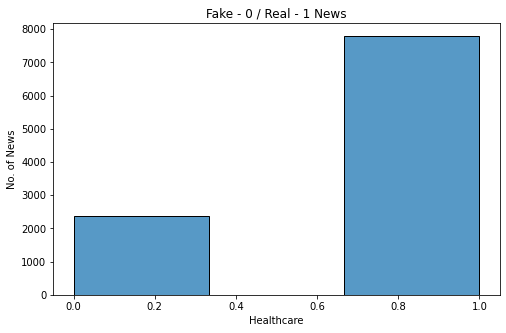

In [12]:
plt.figure(figsize = (8,5))
sns.histplot(df_healthcare['label'], stat='count', bins = 3)
plt.xlabel('Healthcare')
plt.ylabel('No. of News')
plt.title('Fake - 0 / Real - 1 News')
plt.show()

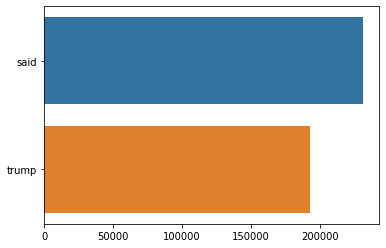

In [ ]:

stop=set(stopwords.words('english'))
df_politics['text'] = df_politics['text'].str.lower()
df_politics['text'] = df_politics.text.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
new = df_politics['text'].str.split()
new=new.values.tolist()
corpus_title_fake=[word for i in new for word in i]

counter=Counter(corpus_title_fake)
most=counter.most_common()
x, y= [], []
for word,count in most[:25]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

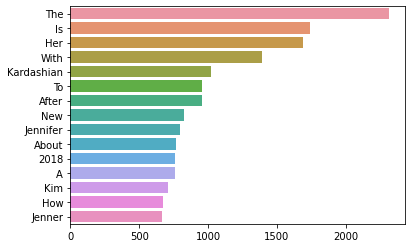

In [ ]:
stop=set(stopwords.words('english'))
df_entertainment['text',] = df_entertainment['text'].str.lower()
df_entertainment['text'] = df_entertainment.text.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
new = df_entertainment['text'].str.split()
new=new.values.tolist()
corpus_title_fake=[word for i in new for word in i]

counter=Counter(corpus_title_fake)
most=counter.most_common()
x, y= [], []
for word,count in most[:25]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

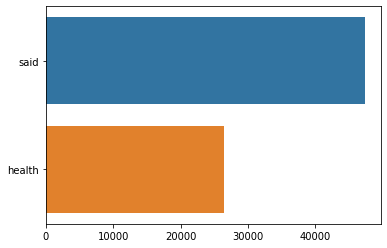

In [ ]:
stop=set(stopwords.words('english'))
df_healthcare['text'] = df_healthcare['text'].str.lower()
df_healthcare['text'] = df_healthcare.text.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
new = df_healthcare['text'].str.split()
new=new.values.tolist()
corpus_title_fake=[word for i in new for word in i]

counter=Counter(corpus_title_fake)
most=counter.most_common()
x, y= [], []
for word,count in most[:25]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fca3c8b7e80>,
      dtype=object)

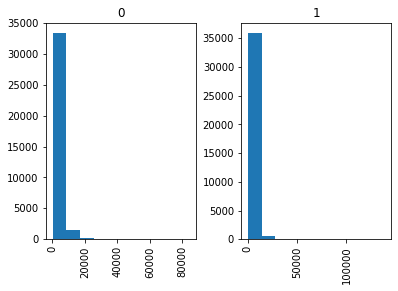

In [ ]:
df_politics['text'].str.len().hist(by=df_politics['label'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fca3c70bac0>,
      dtype=object)

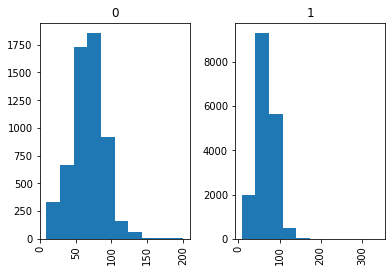

In [ ]:
df_entertainment['text'].str.len().hist(by=df_entertainment['label'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fca3d2c0910>,
      dtype=object)

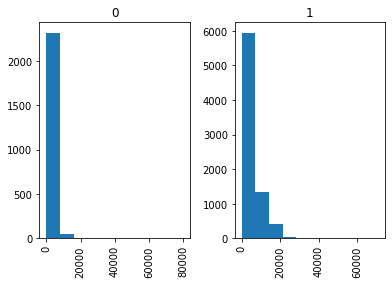

In [ ]:
df_healthcare['text'].str.len().hist(by=df_healthcare['label'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fca3ce14f40>,
      dtype=object)

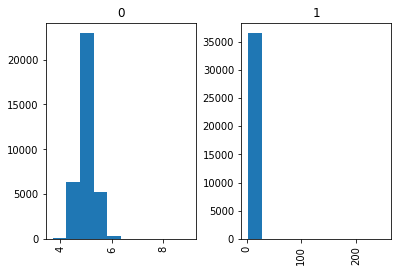

In [ ]:
df_politics['text'].str.split().apply(lambda x:[len(i) for i in x]).map(lambda x: np.mean(x)).hist(by=df_politics['label'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fca3cca7b50>,
      dtype=object)

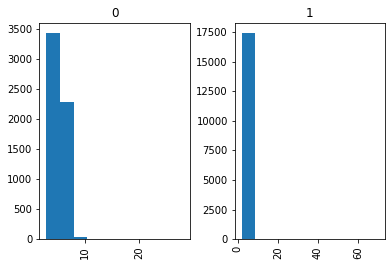

In [ ]:
df_entertainment['text'].str.split().apply(lambda x:[len(i) for i in x]).map(lambda x: np.mean(x)).hist(by=df_entertainment['label'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fca22dc3b20>,
      dtype=object)

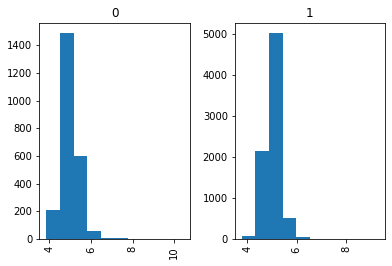

In [ ]:
df_healthcare['text'].str.split().apply(lambda x:[len(i) for i in x]).map(lambda x: np.mean(x)).hist(by=df_healthcare['label'])